In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [2]:
n=6

#EPR
q = QuantumRegister(n,'q')
EPR_circ = QuantumCircuit(q)

EPR_circ.h(q[1])
EPR_circ.cx(q[1],q[0])
EPR_circ.h(q[2])
EPR_circ.cx(q[2],q[3])
EPR_circ.h(q[5])
EPR_circ.cx(q[5],q[4])

EPR_circ.barrier(q)
EPR_circ.draw()

In [3]:
c = ClassicalRegister(n,'c')
AB_circ = QuantumCircuit(q,c)

AB_circ.h(q[2])
AB_circ.h(q[3])
AB_circ.h(q[5])

AB_circ.measure(q,c)
qc = EPR_circ + AB_circ
qc.draw()

In [4]:
from qiskit import IBMQ
api_token = ''
IBMQ.enable_account(api_token)
backend_list = IBMQ.backends()
print(backend_list)
backend = IBMQ.get_backend('ibmq_16_melbourne')

[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]


{'100110': 2, '011100': 54, '011010': 3, '100010': 6, '110100': 4, '011001': 1, '010101': 1, '001111': 45, '000010': 9, '000000': 85, '101011': 7, '100101': 2, '110011': 57, '010011': 67, '100001': 5, '000111': 7, '100000': 59, '000001': 6, '110010': 6, '111011': 10, '101101': 3, '011101': 6, '000100': 9, '010100': 4, '010000': 61, '101001': 1, '011111': 28, '000011': 75, '101000': 8, '001100': 37, '000110': 1, '111101': 5, '011110': 5, '001011': 15, '110001': 3, '111000': 10, '100111': 7, '110111': 4, '101110': 6, '011000': 12, '001000': 15, '111010': 1, '101100': 29, '110000': 46, '001101': 4, '010001': 4, '100011': 60, '011011': 17, '111100': 37, '010010': 8, '111110': 2, '111001': 2, '111111': 23, '100100': 7, '001110': 1, '010111': 4, '001010': 2, '101111': 26}


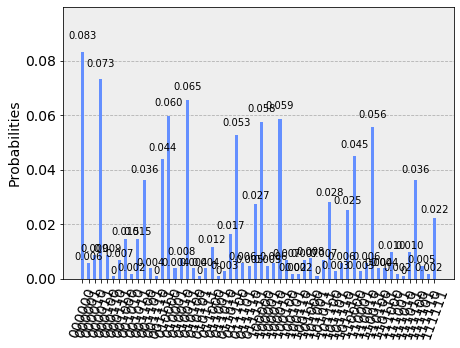

In [5]:
job_sim = qiskit.execute(qc, backend, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)